<a href="https://colab.research.google.com/github/sadoky/inteligencia-_articial_ELECT/blob/main/error_minimo_grad_descendiente_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimize_Error_Goal ( Desc. Grad.)

**Librerias**


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd

*set_de_datos*

In [ ]:
datoscop=pd.read_csv('https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv')

*Seleccion_de_emtradas_y_bandera*

In [ ]:
X1=datoscop["X"]      # vector de entrada X1
X2=datoscop["W"]      # vector de entrada X2

Y1=datoscop["b"]      # bandera  o vector de salida 

**Entorno_de_Clasificacion**

In [ ]:
n=100                 # nuemro de datos a clasificar 
learnrate=0.005       # tasa de aprendizaje 

seleccion_1_1=[]      # vector que clasifica los datos x1=1                   
seleccion_1_2=[]      # vector que clasifica los datos x2=1
seleccion_0_1=[]      # vector que clasifica  los datos x1=0
seleccion_0_2=[]      # vector que clasifica los datos x2=0


for i in range (n):   # ciclo necesario para  la clasificacion de los puntos Y1=1 or Y1=0
  if Y1[i]==1:
    seleccion_1_1.append(X1[i])
    seleccion_1_2.append(X2[i])
  else:
    seleccion_0_1.append(X1[i])
    seleccion_0_2.append(X2[i])

**Funciones**


In [ ]:
def sigmoid(x):  
    sig = 1 / (1 + math.exp(-x))           # función sigmoide
    return sig

In [ ]:
def funcion_error(x):
    return sigmoid(x) * (1 - sigmoid(x))    # Derivada del error

In [ ]:
def ln(x):
    return(math.log(x))                     #  función logaritmo natural

# RED_NEURONAL

-1.3081919705887897 -1.4153779191123705 1.431927846512165


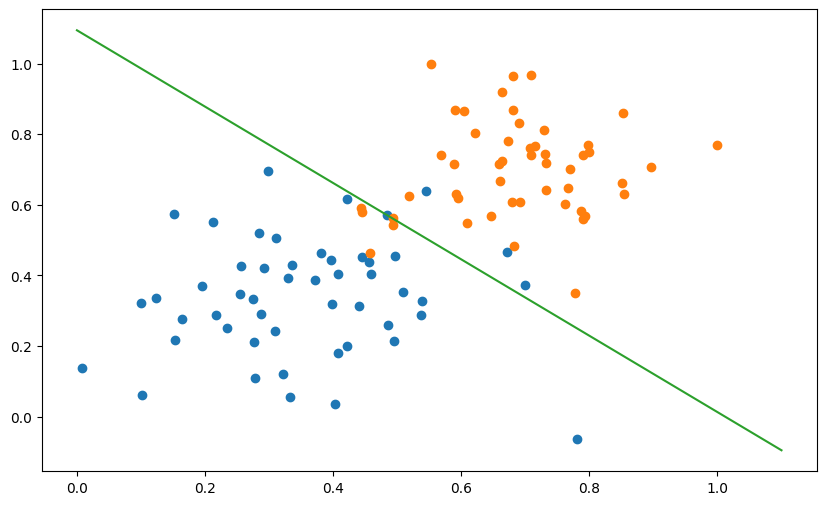

In [ ]:
epochs=50
peso1=1
peso2=1
bias=-0.3                                      #  valores iniciales para el entrenamiento de la red 


Y1_1=np.multiply(Y1,3)                         # Nueva _bandera 


for epocas in range (epochs):

 if epocas>=37:
   learnrate=0.00001



 for i in range(n):
 
  solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias     # Wx +b                                  
  salida=sigmoid(solucion)                      # o(Wx+b)


  error=salida-Y1[i]


  gradiente=funcion_error(salida)

  error_final=error*gradiente

  new1=learnrate*error*X1[i]
  new2=learnrate*error*X2[i]
  newbias=learnrate*-error

  if Y1_1[i]==0:
    peso1=peso1-new1
    peso2=peso2-new2
    bias=bias-newbias                            #  actualzación de pesos y bias 


  if Y1_1[i]==3:
    peso1=peso1-new1
    peso2=peso2-new2
    bias=bias-newbias                            #  actalzacion de pesos y bias 




print(peso1,peso2,bias)


def clasificador(peso1,peso2,bias):
  return (-bias-(peso2*x22))/peso1               #  Recta_clasificadora


x22=np.arange(0,1.2,0.1)
graph=clasificador(peso1,peso2,bias)


plt.figure(figsize=(10,6))                       # Figura para e entorno de decisión 
plt.plot(seleccion_1_1,seleccion_1_2,'o')             
plt.plot(seleccion_0_1,seleccion_0_2,'o') 
plt.plot(x22,graph)

# Función_Error

In [ ]:
def estimate(m,peso1,peso2,bias):
    step_8=0
    for i in range(m):
        solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias
        step_1=1-Y1_1[i]
        step_2=ln(1-sigmoid(solucion))
        step_3=np.multiply(step_1,step_2)

       

        step_4=Y1_1[i]
        step_5=ln(sigmoid(solucion))
        step_6=np.multiply(step_4,step_5)

        step_7=step_3+step_6
        step_8=step_8+step_7

    

    return step_8

*Error_inicial*


In [ ]:
goal_1=-0.01*estimate(100,1,1,-0.3)
print(goal_1)

0.5550442136125316


*Error_final*

In [ ]:
goal_2=-0.01*estimate(100,peso1,peso2,bias)
print(goal_2)

0.009519341638774296
